In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt


import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator


In [2]:
#initializing h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 12.0.2+10, mixed mode, sharing)
  Starting server from C:\Users\anike\.conda\envs\credit\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\anike\AppData\Local\Temp\tmpeb8ahq87
  JVM stdout: C:\Users\anike\AppData\Local\Temp\tmpeb8ahq87\h2o_anike_started_from_python.out
  JVM stderr: C:\Users\anike\AppData\Local\Temp\tmpeb8ahq87\h2o_anike_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,"2 years, 10 months and 1 day !!!"
H2O_cluster_name:,H2O_from_python_anike_t72gd7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.928 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
#uplaoding file
df = h2o.upload_file(r"X:\Project\Autoencoderr\New folder\creditcard.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
df= df.drop(['Time'], axis=1)

In [5]:
df.shape

(284807, 30)

In [6]:
df

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


In [7]:
#splitting data into train and test
train,test = df.split_frame(ratios=[.80])

In [8]:
print(train.shape)
print(test.shape)

(227728, 30)
(57079, 30)


In [9]:

train = train.drop(['Class'], axis=1)

y_test = test['Class']
y_test_df = y_test.as_data_frame()

test = test.drop(['Class'], axis=1)

In [10]:
#h2o autoencoder
Autoencoder = h2o.estimators.deeplearning.H2OAutoEncoderEstimator(hidden=[20,15,10,15,20], 
                                                                  epochs=100, 
                                                                  activation='tanh', 
                                                                  autoencoder=True) 
Autoencoder.train(x = train.columns, training_frame = train) 


deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [22]:
print(Autoencoder)

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1680510018440_1


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 2,169 weights/biases, 35.4 KB, 12,300,334 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,29,Input,0.0,,,,,,,,,
1,,2,20,Tanh,0.0,0.0,0.0,0.708768,0.238635,0.0,0.033439,1.607521,-0.007756,0.167128
2,,3,15,Tanh,0.0,0.0,0.0,0.203848,0.16709,0.0,-0.036125,0.394684,0.212316,0.990762
3,,4,10,Tanh,0.0,0.0,0.0,0.093177,0.075542,0.0,0.06718,0.496783,-0.07382,0.502393
4,,5,15,Tanh,0.0,0.0,0.0,0.160013,0.165667,0.0,0.078077,1.215578,0.243182,1.511173
5,,6,20,Tanh,0.0,0.0,0.0,0.143411,0.105031,0.0,0.101826,1.306696,-0.294547,1.727828
6,,7,29,Tanh,,0.0,0.0,0.034227,0.014781,0.0,0.001578,0.050986,-0.01477,0.036237




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.0001289134704055563
RMSE: 0.011354006799608511

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2023-04-03 13:50:26,1.019 sec,0.00000 obs/sec,0.000000,0,0.0,0.052263,0.002731
1,,2023-04-03 13:50:31,6.138 sec,58845 obs/sec,1.318112,3,300171.0,0.018053,0.000326
2,,2023-04-03 13:50:37,11.996 sec,54818 obs/sec,2.634191,6,599879.0,0.016626,0.000276
3,,2023-04-03 13:50:43,18.435 sec,57559 obs/sec,4.389847,10,999691.0,0.015918,0.000253
4,,2023-04-03 13:50:50,24.997 sec,58505 obs/sec,6.144212,14,1399209.0,0.015935,0.000254
5,,2023-04-03 13:50:55,30.010 sec,58768 obs/sec,7.461990,17,1699304.0,0.015389,0.000237
6,,2023-04-03 13:51:01,36.429 sec,59433 obs/sec,9.217935,21,2099182.0,0.015175,0.000230
7,,2023-04-03 13:51:08,42.923 sec,59791 obs/sec,10.975598,25,2499451.0,0.014478,0.000210
8,,2023-04-03 13:51:13,48.544 sec,59048 obs/sec,12.293328,28,2799535.0,0.013851,0.000192
9,,2023-04-03 13:51:19,54.310 sec,58291 obs/sec,13.608814,31,3099108.0,0.014641,0.000214



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,V7,1.000000,1.000000,0.070610
1,V5,0.911327,0.911327,0.064349
2,V2,0.855384,0.855384,0.060399
3,V12,0.848665,0.848665,0.059924
4,V6,0.806836,0.806836,0.056971
5,V10,0.778487,0.778487,0.054969
6,V17,0.739355,0.739355,0.052206
7,V16,0.708539,0.708539,0.050030
8,V9,0.619560,0.619560,0.043747
9,V1,0.552744,0.552744,0.039029



See the whole table with table.as_data_frame()



In [21]:
#predictions
prediction = Autoencoder.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


Text(0.5, 0, 'Epoch')

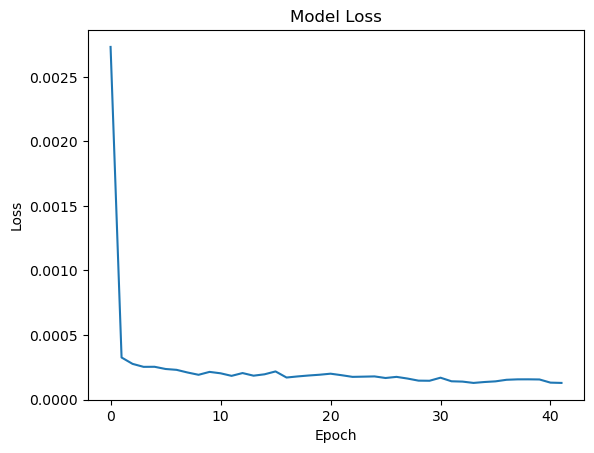

In [13]:
#model loss
scoring_history = Autoencoder.score_history()
plt.plot(scoring_history['training_mse'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')


In [14]:
#anomaly is a function which calculates the error for the dataset
test_rec_error = Autoencoder.anomaly(test)
test_rec_error_df = test_rec_error.as_data_frame()

In [15]:
test_rec_error_df

,Reconstruction.MSE
0,0.000025
1,0.000072
2,0.000068
3,0.000023
4,0.000036
...,...
57074,0.000112
57075,0.000028
57076,0.000179
57077,0.000028


In [16]:
error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                        'true_class': y_test_df['Class']})

In [17]:
error_df

,reconstruction_error,true_class
0,0.000025,0
1,0.000072,0
2,0.000068,0
3,0.000023,0
4,0.000036,0
...,...,...
57074,0.000112,0
57075,0.000028,0
57076,0.000179,0
57077,0.000028,0


In [18]:
error_df.describe()

,reconstruction_error,true_class
count,57079.000000,57079.000000
mean,0.000121,0.001419
std,0.000695,0.037644
min,0.000006,0.000000
25%,0.000027,0.000000
50%,0.000045,0.000000
75%,0.000089,0.000000
max,0.099853,1.000000


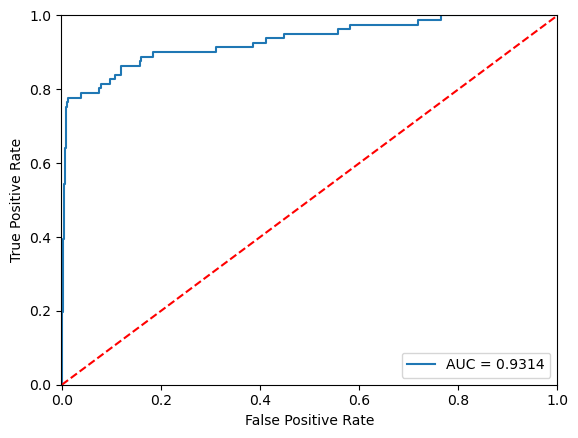

In [19]:
from sklearn.metrics import ( auc,roc_curve,roc_auc_score)


fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();